<a href="https://colab.research.google.com/github/satria-siregar/PSDS-2.0-Kelas-Mahir/blob/main/Nauval_Satriani_Siregar_1800015003_MPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MINI PROJECT**#

#**Materi A**

##**Pendahuluan**##
Penyakit diabetes adalah salah satu penyakit yang ditandai dengan tingginya kadar gula darah (glukosa) dalam tubuh. Glukosa merupakan sumber energi utama sel tubuh manusia. Apabila glukosa tidak terserap dengan baik maka akan memunculkan gangguan organ tubuh, salah satunya adalah diabetes.
Terdapat 425 juta pasien diabetes per tahun 2017 di dunia dengan 75% pasien diabetes pada tahun 2017 berusia 20-64 tahun. Total penderita diperkirakan akan meningkat sebesar 45% atau setara dengan 629 juta pasien per tahun 2045. Indonesia menempati urutan ke-6 dari sepuluh negara dengan jumlah pasien diabetes tertinggi, yakni 10,3 juta pasien per tahun 2017 dan diperkirakan akan meningkat menjadi 16,7 juta pasien per tahun 2045. Dilansir dari health kompas, penyakit Diabetes merupakan salah satu dari 10 penyakit dengan kasus kematian tertinggi di Indonesia.

##**Hipotesis**
Dengan menggunakan Metode Klasifikasi Naive Bayes apabila class target menunjukkan hasil positif, maka terdapat kecenderungan individu tersebut menderita penyakit diabetes. Sebaliknya, jika class target menunjukkan hasil negatif maka terdapat kecenderungan individu tersebut tidak terkena penyakit diabetes.

##**Dataset**
Dataset yang digunakan adalah dataset yang didapatkan dari situs kaggle, dimana dataset tersebut merupakan data kuisioner pasien di Rumah Sakit Sylhet Diabetes India.

Link dataset :

https://www.kaggle.com/ishandutta/early-stage-diabetes-risk-prediction-dataset

#**Materi B**

##**Import Library**

In [1]:
import pandas as pd                           
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

##**Membuka Dataset**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/satria-siregar/PSDS-2.0-Kelas-Mahir/main/Mini-Project/diabetes_data_upload.csv')
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


##**Eksploratory Data Analysis**

###Dimensi Data

In [3]:
df.shape

(520, 17)

###Tipe Data

In [4]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

Age = Umur

Gender = Jenis Kelamin

Polyuria = Jumlah buang air kecil berlebih

Polydipsia = Rasa haus yang berlebihan

Sudden Weight Loss = Penurunan berat bedan secara tiba tiba

Weakness = Lemas

Polyphagia = Peningkatan nafsu makan yang berlebihan

Genital Thrush = Penyakit gatal pada alat kelamin

Visual Blurring = Pandangan mata kabur

Itching = Gatal gatal

Irritability = Mudah marah

Delayed Healing = Luka luar lama sembuh (luka hati apa lagi, cieeee)

Partial Paresis = Otot otot melemah bahkan sampai kelumpuhan sebagian

Muscle Stiffness = Otot kaku

Alopecia = Kebotakan rambut

Obesity = Obesitas / kelebihan berat badan

Class = individu positif atau negatif diabetes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

###Cek Missing Data

In [6]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

##**Encoding**
Kita perlu melakukan encoding terlebih dahulu, supaya bisa melakukan perhitungan maupun melihat data statistik

###Mengubah tipe data object menjadi category

In [7]:
df["Gender"] = df["Gender"].astype('category')
df["Polyuria"] = df["Polyuria"].astype('category')
df["Polydipsia"] = df["Polydipsia"].astype('category')
df["sudden weight loss"] = df["sudden weight loss"].astype('category')
df["weakness"] = df["weakness"].astype('category')
df["Polyphagia"] = df["Polyphagia"].astype('category')
df["Genital thrush"] = df["Genital thrush"].astype('category')
df["visual blurring"] = df["visual blurring"].astype('category')
df["Itching"] = df["Itching"].astype('category')
df["Irritability"] = df["Irritability"].astype('category')
df["delayed healing"] = df["delayed healing"].astype('category')
df["partial paresis"] = df["partial paresis"].astype('category')
df["muscle stiffness"] = df["muscle stiffness"].astype('category')
df["Alopecia"] = df["Alopecia"].astype('category')
df["Obesity"] = df["Obesity"].astype('category')
df["class"] = df["class"].astype('category')

In [8]:
df.dtypes

Age                      int64
Gender                category
Polyuria              category
Polydipsia            category
sudden weight loss    category
weakness              category
Polyphagia            category
Genital thrush        category
visual blurring       category
Itching               category
Irritability          category
delayed healing       category
partial paresis       category
muscle stiffness      category
Alopecia              category
Obesity               category
class                 category
dtype: object

###Encoding data menjadi 1 dan 0

In [9]:
df["Gender"] = df["Gender"].cat.codes
df["Polyuria"] = df["Polyuria"].cat.codes
df["Polydipsia"] = df["Polydipsia"].cat.codes
df["sudden weight loss"] = df["sudden weight loss"].cat.codes
df["weakness"] = df["weakness"].cat.codes
df["Polyphagia"] = df["Polyphagia"].cat.codes
df["Genital thrush"] = df["Genital thrush"].cat.codes
df["visual blurring"] = df["visual blurring"].cat.codes
df["Itching"] = df["Itching"].cat.codes
df["Irritability"] = df["Irritability"].cat.codes
df["delayed healing"] = df["delayed healing"].cat.codes
df["partial paresis"] = df["partial paresis"].cat.codes
df["muscle stiffness"] = df["muscle stiffness"].cat.codes
df["Alopecia"] = df["Alopecia"].cat.codes
df["Obesity"] = df["Obesity"].cat.codes
df["class"] = df["class"].cat.codes

In [10]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


###Melihat Korelasi Data

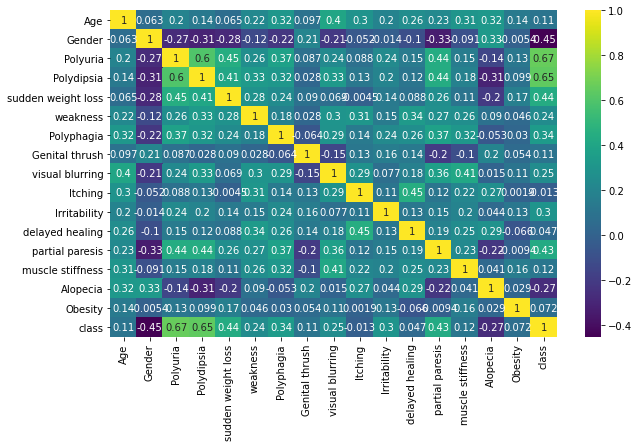

In [11]:
k = len(df.columns)
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

###Melihat Statistik Data

In [12]:
df.describe()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###Pair Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

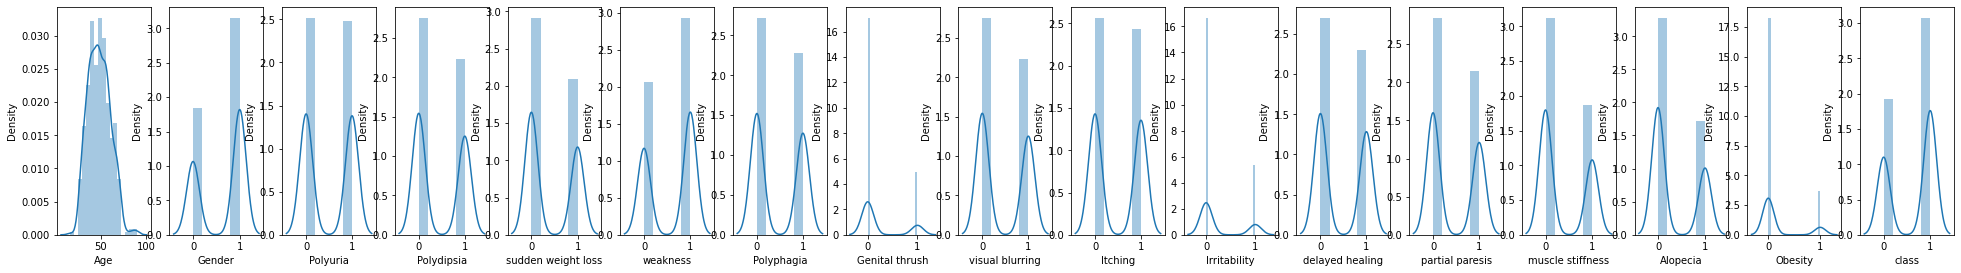

In [13]:
l = df.columns.values
number_of_columns=len(df.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

##**Klasifikasi dengan Metode Naive Bayes**

###Split Data

In [14]:
y=df['class']
X=df.drop(columns=['class'])

#Mengubah data menjadi array
y=np.array(y)
X=np.array(X)

In [15]:
#Membagi dataset menjadi data tes dan data training
X_latih, X_uji, y_latih, y_uji = train_test_split(X, y, test_size=0.2, random_state = 0)

###Membuat fungsi untuk menentukan akurasi

In [16]:
def akurasi(y_asli, y_pred):
    akr = np.sum(y_asli == y_pred) / len(y_asli)
    return akr

###Naive Bayes Scikit Learn

In [17]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()

# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_latih, y_latih)

# Menentukan hasil prediksi dari x_test
prediksi_1 = nbtrain.predict(X_uji)

print("Akurasi Klasifikasi Naive Bayes", akurasi(y_uji, prediksi_1)*100, "%")
print(prediksi_1)
print(y_uji)

Akurasi Klasifikasi Naive Bayes 93.26923076923077 %
[1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1]
[1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1
 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1]


###Matriks Confusion

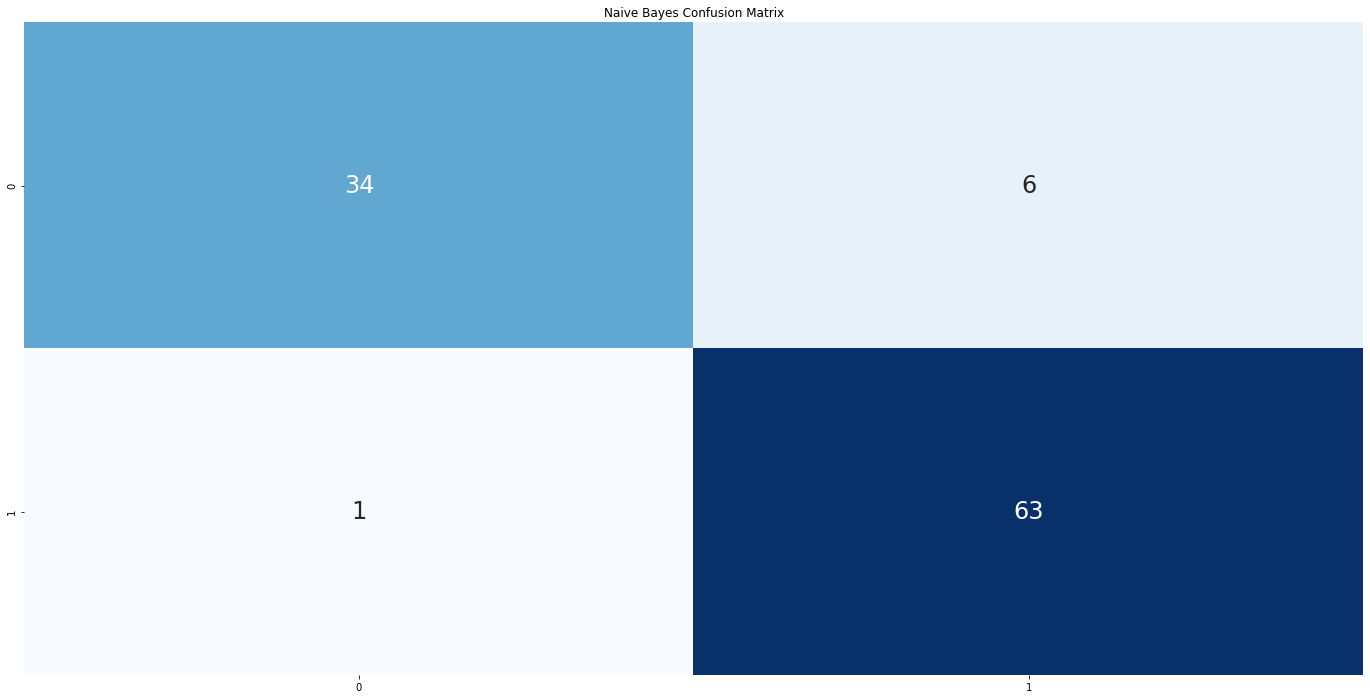

In [18]:
y_head_nb = prediksi_1
cm_nb = confusion_matrix(y_uji,y_head_nb)
plt.figure(figsize=(24,12))
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

###Kesimpulan
Dengan menggunakan metode Naive Bayes, kita dapatkan akurasi sebesar 93%